# 🎬 Movie Recommendation System (Unsupervised ML)

**Cel:** Zbudować prosty system rekomendacji filmów przy użyciu _unsupervised learning_ (cosine similarity), 
bazując na danych MovieLens 100k.

**Zakres:**
- Analiza ocen użytkowników filmów  
- Budowa macierzy user–movie  
- Obliczenie podobieństwa między filmami  
- Funkcja `recommend()` sugerująca podobne tytuły  
- Wizualizacja podobieństw

**Zastosowane technologie:**  
`Python`, `Pandas`, `NumPy`, `scikit-learn`, `Matplotlib`


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns




In [4]:

ratings_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv("ml-100k/u.data", sep='\t', names=ratings_cols)


movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',
               'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
               'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
               'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv("ml-100k/u.item", sep='|', encoding='latin-1', names=movies_cols)


df = pd.merge(ratings, movies, on='movie_id')

df=df.drop(['imdb_url','release_date','video_release_date','unknown'],axis=1)
df.head()


,user_id,movie_id,rating,timestamp,title,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:

user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

user_movie_matrix.head(2)



title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
user_movie_matrix_filled = user_movie_matrix.fillna(0)

cosine_sim = cosine_similarity(user_movie_matrix_filled.T)

cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=user_movie_matrix.columns,
    columns=user_movie_matrix.columns
)

cosine_sim_df.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449


In [7]:
def recommend(movie_title, n=5):
    if movie_title not in cosine_sim_df.columns:
        print(f"❌ Film '{movie_title}' nie został znaleziony w bazie.")
        return
    
    similar_movies = cosine_sim_df[movie_title].sort_values(ascending=False)[1:n+1]
    
    
    print(f"🎬 Filmy podobne do '{movie_title}':\n")
    for title, score in similar_movies.items():
        print(f"{title} (similarność: {score:.2f})")
recommend("Toy Story (1995)")


🎬 Filmy podobne do 'Toy Story (1995)':

Star Wars (1977) (similarność: 0.73)
Return of the Jedi (1983) (similarność: 0.70)
Independence Day (ID4) (1996) (similarność: 0.69)
Rock, The (1996) (similarność: 0.66)
Mission: Impossible (1996) (similarność: 0.64)


In [8]:

user_similarity = cosine_similarity(user_movie_matrix.fillna(0))
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_movie_matrix.index,
    columns=user_movie_matrix.index
)

print("✅ Macierz podobieństwa użytkowników gotowa!")
user_similarity_df.head()


✅ Macierz podobieństwa użytkowników gotowa!


user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.168937,0.048388,0.064561,0.379670,0.429682,0.443097,0.320079,0.078385,0.377733,...,0.372213,0.119860,0.269860,0.193343,0.197949,0.118722,0.315064,0.149086,0.181612,0.399432
2,0.168937,1.000000,0.113393,0.179694,0.073623,0.242106,0.108604,0.104257,0.162470,0.161273,...,0.147095,0.310661,0.363328,0.410725,0.322713,0.231096,0.228793,0.162911,0.175273,0.106732
3,0.048388,0.113393,1.000000,0.349781,0.021592,0.074018,0.067423,0.084419,0.062039,0.066217,...,0.033885,0.043453,0.167140,0.071288,0.126278,0.026758,0.164539,0.102899,0.136757,0.026990
4,0.064561,0.179694,0.349781,1.000000,0.031804,0.068431,0.091507,0.188060,0.101284,0.060859,...,0.054615,0.036784,0.133619,0.196561,0.146058,0.030202,0.196858,0.152041,0.171538,0.058752
5,0.379670,0.073623,0.021592,0.031804,1.000000,0.238636,0.374733,0.248930,0.056847,0.201427,...,0.340183,0.080580,0.095284,0.081053,0.148607,0.071612,0.239955,0.139595,0.153799,0.313941


In [11]:
def recommend_for_user(user_id, n=5):
    if user_id not in user_movie_matrix.index:
        print(f"❌ Użytkownik {user_id} nie został znaleziony.")
        return

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:6]
    print(f"👥 Najbardziej podobni do użytkownika {user_id}:\n{similar_users}\n")

    similar_users_ids = similar_users.index
    similar_users_ratings = user_movie_matrix.loc[similar_users_ids]

    avg_ratings = similar_users_ratings.mean().sort_values(ascending=False)

    user_rated = user_movie_matrix.loc[user_id]
    unseen_movies = avg_ratings[user_rated.isna()]

    print(f"🎬 Rekomendacje dla użytkownika {user_id}:\n")
    for title, score in unseen_movies.head(n).items():
        print(f"{title} (średnia ocena podobnych użytkowników: {score:.2f})")
recommend_for_user(17)



👥 Najbardziej podobni do użytkownika 17:
user_id
657    0.546484
540    0.487061
470    0.469831
680    0.458524
199    0.454693
Name: 17, dtype: float64

🎬 Rekomendacje dla użytkownika 17:

Wrong Trousers, The (1993) (średnia ocena podobnych użytkowników: 5.00)
Star Wars (1977) (średnia ocena podobnych użytkowników: 5.00)
Close Shave, A (1995) (średnia ocena podobnych użytkowników: 5.00)
Cold Comfort Farm (1995) (średnia ocena podobnych użytkowników: 5.00)
Schindler's List (1993) (średnia ocena podobnych użytkowników: 5.00)


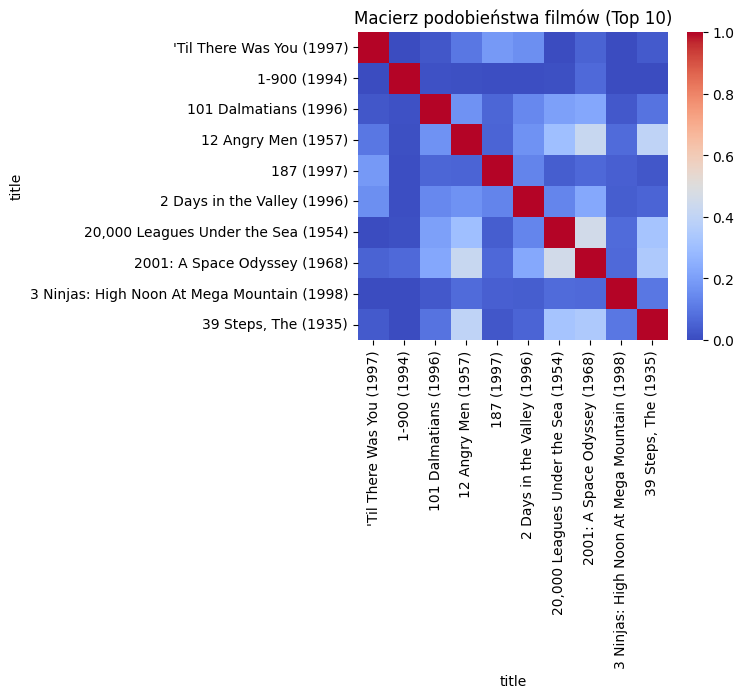

In [10]:
plt.figure(figsize=(5,4))
sns.heatmap(cosine_sim_df.iloc[:10, :10], cmap="coolwarm")
plt.title("Macierz podobieństwa filmów (Top 10)")
plt.show()

System rekomendacji z powodzeniem identyfikuje filmy o podobnych wzorcach ocen oraz potrafi generować personalizowane rekomendacje dla użytkowników. Model wykorzystuje cosine similarity jako metrykę odległości w przestrzeni gustów widzów.